In [2]:
#| output: false
import src
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

td = pd.read_pickle('../results/dekodec/Prez_20220721_dekodec_split.pkl')
td.columns

/Users/raeed/codebase/0-projects/cst-dynamics/env/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Index(['M1_spikes', 'M1_unit_guide', 'MC_spikes', 'MC_unit_guide',
       'PMd_spikes', 'PMd_unit_guide', 'bin_size', 'cst_cursor_command',
       'ct_location', 'cursor_pos', 'date_time', 'hand_pos', 'idx_cstEndTime',
       'idx_cstStartTime', 'idx_ctHoldTime', 'idx_endTime', 'idx_failTime',
       'idx_goCueTime', 'idx_pretaskHoldTime', 'idx_rewardTime',
       'idx_rtHoldTimes', 'idx_rtgoCueTimes', 'idx_startTime', 'lambda',
       'monkey', 'raw_left_eye_pos', 'raw_left_pupil', 'rel_cursor_pos',
       'rel_hand_pos', 'result', 'rt_locations', 'task', 'trial_id',
       'session_date', 'M1_rates', 'MC_rates', 'PMd_rates', 'lfads_rates',
       'lfads_inputs', 'hand_vel', 'hand_acc', 'cursor_vel', 'hand_speed',
       'Time from go cue (s)', 'Time from task cue (s)', 'trialtime',
       'lfads_rates_joint_pca', 'lfads_rates_joint_pca_cst_unique',
       'lfads_rates_joint_pca_rtt_unique', 'lfads_rates_joint_pca_shared',
       'lfads_rates_joint_pca_split'],
      dtype='object')

Let's convert the old PyalData format to a new hierarchical DataFrame format, keeping only the columns we need for now.

In [3]:
events = src.crystal.extract_trial_event_times(td)
tf = (
    td
    .pipe(src.data.add_trial_time,column_name='trial time')
    .filter(items=[
        'trial_id',
        'task',
        'trial time',
        'rel_cursor_pos',
        'cursor_vel',
        'rel_hand_pos',
        'hand_vel',
        'hand_speed',
        'lfads_rates',
    ])
    .explode([
        'trial time',
        'rel_cursor_pos',
        'cursor_vel',
        'rel_hand_pos',
        'hand_vel',
        'hand_speed',
        'lfads_rates',
    ])
    .assign(**{'trial time': lambda x: pd.to_timedelta(x['trial time'], unit='s')})
    .set_index(['trial_id','task','trial time'])
    .pipe(
        src.crystal.express_crystallize,
        single_cols=['hand_speed'],
        array_cols=[
            'rel_cursor_pos',
            'cursor_vel',
            'rel_hand_pos',
            'hand_vel',
            'lfads_rates',
        ]
    )
)
tf

signal                               hand_speed rel_cursor_pos             \
channel                                     0              0          1     
trial_id task trial time                                                    
1        CST  0 days 00:00:00          8.977924      -4.025707  -5.850120   
              0 days 00:00:00.010000   9.712004      -3.966160  -5.821519   
              0 days 00:00:00.020000  11.015917      -3.884967  -5.722092   
              0 days 00:00:00.030000  10.916048      -3.806998  -5.666936   
              0 days 00:00:00.040000   10.62704      -3.704673  -5.607723   
...                                         ...            ...        ...   
394      CST  0 days 00:00:03.030000    7.54683      27.525579 -10.182451   
              0 days 00:00:03.040000   6.924867      27.471843 -10.142223   
              0 days 00:00:03.050000   8.832921      27.409117 -10.138108   
              0 days 00:00:03.060000   12.50278      27.315395 -10.183912   
              0 days 00:00:03.070000  16.584867      27.192005 -10.262625   

signal                               cursor_vel           rel_hand_pos  \
channel                                     0         1            0     
trial_id task trial time                                                 
1        CST  0 days 00:00:00          5.729341  5.338938    -4.025707   
              0 days 00:00:00.010000   7.036972  6.401392    -3.966160   
              0 days 00:00:00.020000   7.958073  7.729136    -3.884967   
              0 days 00:00:00.030000   9.014685  5.718453    -3.806998   
              0 days 00:00:00.040000   9.986239  3.889947    -3.704673   
...                                         ...       ...          ...   
394      CST  0 days 00:00:03.030000  -5.938797  3.978445    27.525579   
              0 days 00:00:03.040000  -5.823107  2.217181    27.471843   
              0 days 00:00:03.050000  -7.822422 -2.084443    27.409117   
              0 days 00:00:03.060000 -10.855589 -6.225854    27.315395   
              0 days 00:00:03.070000 -12.996360 -9.711643    27.192005   

signal                                                       hand_vel  \
channel                                     1          2          0     
trial_id task trial time                                                
1        CST  0 days 00:00:00         -5.850120 -16.486355   5.973144   
              0 days 00:00:00.010000  -5.821519 -16.479292   6.727050   
              0 days 00:00:00.020000  -5.722092 -16.439823   8.104012   
              0 days 00:00:00.030000  -5.666936 -16.467788   9.122670   
              0 days 00:00:00.040000  -5.607723 -16.457319   9.736655   
...                                         ...        ...        ...   
394      CST  0 days 00:00:03.030000 -10.182451 -93.107882  -5.893637   
              0 days 00:00:03.040000 -10.142223 -93.099388  -5.828899   
              0 days 00:00:03.050000 -10.138108 -93.052599  -7.843264   
              0 days 00:00:03.060000 -10.183912 -93.020257 -10.834871   
              0 days 00:00:03.070000 -10.262625 -93.041543 -12.983107   

signal                                          ... lfads_rates            \
channel                                    1    ...         146       147   
trial_id task trial time                        ...                         
1        CST  0 days 00:00:00         5.603109  ...   -0.028163 -0.034251   
              0 days 00:00:00.010000  6.436993  ...   -0.028198 -0.034438   
              0 days 00:00:00.020000  7.461590  ...   -0.028357 -0.034809   
              0 days 00:00:00.030000  5.939561  ...   -0.028632 -0.035118   
              0 days 00:00:00.040000  3.721528  ...   -0.028864 -0.035133   
...                                        ...  ...         ...       ...   
394      CST  0 days 00:00:03.030000  3.966632  ...    0.053847 -0.002355   
              0 days 00:00:03.040000  1.993919  ...    0.054801 -0.003483   
              

Need to figure out a way to extract the random target onsets indexed by the target number.

In [4]:
target_locs = (
    td
    .set_index('trial_id')
    .groupby('task')
    .get_group('RTT')
    ['rt_locations']
    .map(lambda x: x[:,0])
)
target_times = (
    events
    .to_frame()
    .assign(**{'target number': lambda x: x.groupby(['trial_id','event']).cumcount()})
    .set_index('target number', append=True)
    .squeeze()
    .unstack(level='event')
    [['rtgoCue','rtHold']]
    .rename(columns={'rtgoCue':'target onset','rtHold':'target acquisition'})
    .assign(**{
        'location': pd.DataFrame(np.row_stack(target_locs.values),index=target_locs.index)
        .rename_axis(columns='target number')
        .stack()
    })
)
target_times.loc[2]

event                   target onset     target acquisition  location
target number                                                        
0             0 days 00:00:00.980000 0 days 00:00:01.680000     97.50
1             0 days 00:00:01.690000 0 days 00:00:02.570000     22.50
2             0 days 00:00:02.580000 0 days 00:00:03.070000     35.00
3             0 days 00:00:03.080000 0 days 00:00:03.750000    103.75
4             0 days 00:00:03.760000 0 days 00:00:03.800000    110.00
5             0 days 00:00:03.810000 0 days 00:00:04.370000     66.25
6             0 days 00:00:04.380000 0 days 00:00:04.930000     35.00
7             0 days 00:00:04.940000 0 days 00:00:05.020000     28.75

In [83]:
events

trial_id  event      
1         ctHold               0 days 00:00:00
          pretaskHold   0 days 00:00:00.320000
          goCue         0 days 00:00:00.880000
          cstStart      0 days 00:00:00.890000
          reward        0 days 00:00:06.880000
                                 ...          
394       goCue         0 days 00:00:00.980000
          cstStart      0 days 00:00:00.990000
          fail          0 days 00:00:02.240000
          cstEnd        0 days 00:00:02.240000
          end           0 days 00:00:03.080000
Length: 4742, dtype: timedelta64[ns]

Text(0.5, 0, 'time relative to go cue (ns)')

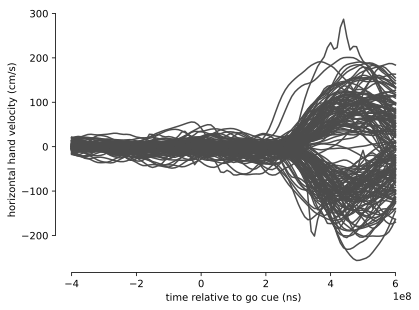

In [5]:
temp = (
    tf
    .pipe(src.munge.reindex_from_event_times,events.xs(key='goCue',level='event'),timecol='trial time')
    .xs(key='RTT',axis=0,level='task')
    .loc[(slice(None),slice('-0.4s','0.6s')),:]
)
ax = sns.lineplot(
    data=temp,
    x='relative time',
    y=('hand_vel',0),
    units='trial_id',
    color='0.3',
    estimator=None,
    errorbar=None
)
sns.despine(ax=ax, trim=True)
ax.set_ylabel('horizontal hand velocity (cm/s)')
ax.set_xlabel('time relative to go cue (ns)')

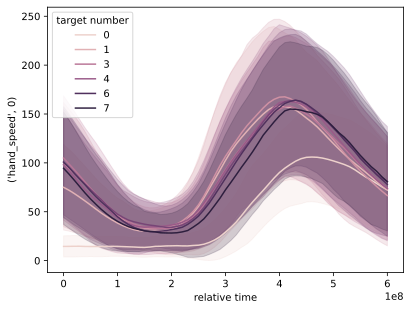

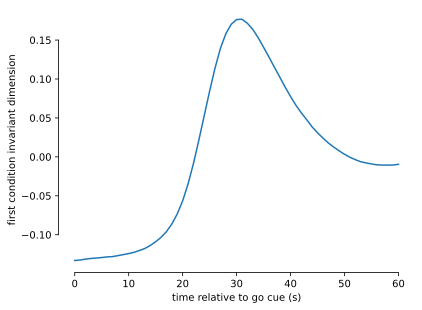

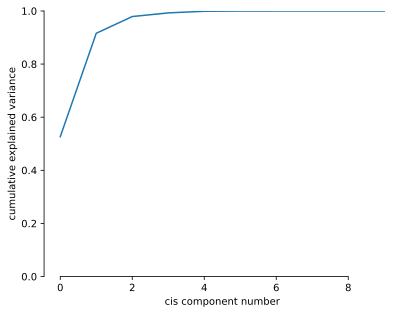

In [6]:
for target_number,target_onset in target_times['target onset'].groupby('target number'):
    temp_targ_times = src.munge.reindex_from_event_times(tf,target_onset.reset_index(level='target number',drop=True),timecol='trial time')

temp_targ_times.loc[5]

temp = (
    target_times
    ['target onset']
    .groupby('target number')
    .apply(lambda x: src.munge.reindex_from_event_times(
        tf,
        x.reset_index(level='target number',drop=True),
        timecol='trial time'
    ))
    .xs(key='RTT',level='task',axis=0)
    .loc[(slice(None),slice(None),slice('0s','0.6s')),:]
)
sns.lineplot(
    data=temp,
    x='relative time',
    y=('hand_speed',0),
    hue='target number',
    errorbar='sd',
)

from dPCA import dPCA

trials = (
    temp['lfads_rates']
    .stack()
    .reorder_levels(['trial_id','channel','target number','relative time'])
    # .reorder_levels(['channel','target number','relative time','trial_id'])
    .xs(key=0,level='target number')
    .to_xarray()
)
tensor = np.mean(trials,axis=0)
# tensor = trials

dpca = dPCA.dPCA(
    labels='t',
    # labels='tr',
    # join={'tr':['r','tr']},
    regularizer=None
)
dpca.protect = ['t']
Z = dpca.fit_transform(tensor.to_numpy())

fig,ax=plt.subplots()
ax.plot(
    # np.linspace(0,0.6,tensor.shape[1]),
    Z['t'][0,...]#.mean(axis=-1)
)
ax.set_xlabel('time relative to go cue (s)')
ax.set_ylabel('first condition invariant dimension')
sns.despine(ax=ax,trim=True)

fig,ax=plt.subplots()
ax.plot(
    np.cumsum(dpca.explained_variance_ratio_['t'])
)
ax.set_ylim([0,1])
ax.set_ylabel('cumulative explained variance')
ax.set_xlabel('cis component number')
sns.despine(ax=ax, trim=True)

-0.07041251634573092

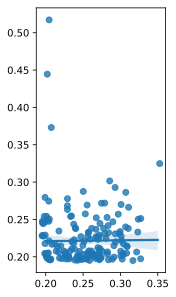

In [7]:
from pyaldata import get_onset_idx
reaction_time = (
    tf
    .pipe(src.munge.reindex_from_event_times,events.xs(key='goCue',level='event'),timecol='trial time')
    .xs(key='RTT',axis=0,level='task')
    .loc[(slice(None),slice('0.2s','0.6s')),:]
    .groupby('trial_id')
    .apply(lambda df: pd.to_timedelta(get_onset_idx(df[('hand_speed',0)])*10e-3 + 0.2,unit='s'))
)
# sns.lineplot(
#     data=(
#         tf
#         .pipe(src.munge.reindex_from_event_times,events.xs(key='goCue',level='event'),timecol='trial time')
#         .xs(key='RTT',axis=0,level='task')
#         .loc[(slice(None),slice('0s','0.6s')),:]
#         .loc[5,('hand_speed',0)]
#     ),
# )

neural_onset = (
    tf
    .pipe(src.munge.reindex_from_event_times,events.xs(key='goCue',level='event'),timecol='trial time')
    .pipe(lambda df: pd.DataFrame(
        dpca.transform(df['lfads_rates'].values.T,marginalization='t').T,
        index=df.index)
    )
    .xs(key='RTT',axis=0,level='task')
    .loc[(slice(None),slice('0.2s','0.6s')),:]
    .groupby('trial_id')
    .apply(lambda df: pd.to_timedelta(get_onset_idx(df.loc[:,0],min_ds=0.01)*10e-3 + 0.2,unit='s'))
)

# threshold = 0.1
# crossings = (
#     cis.loc[(slice(None),slice('0s',None)),0]
#     .gt(threshold)
#     .groupby('trial_id')
#     .idxmax()
#     .apply(lambda x: x[1])
# )
ax = sns.regplot(
    x=reaction_time.dt.total_seconds(),
    y=neural_onset.dt.total_seconds(),
    x_jitter=0.005,
    y_jitter=0.005,
    robust=True,
)
ax.set_aspect('equal')
reaction_time.corr(neural_onset)

In [8]:
np.cumsum(dpca.explained_variance_ratio_['t'])
dpca.explained_variance_ratio_['t']

[0.13408695595824027,
 0.07235378551727124,
 0.051149259985264046,
 0.147425041753664,
 0.05569264265675655,
 0.035930995351483794,
 0.02963379331888569,
 0.03361935087213956,
 0.06986857741881523,
 0.020672215782617253]

/var/folders/wf/m89rq9p97kq6fdqj23hkrm_h0000gn/T/ipykernel_2165/3949183365.py:40: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  cis


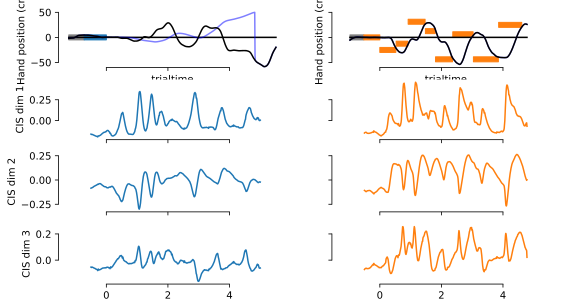

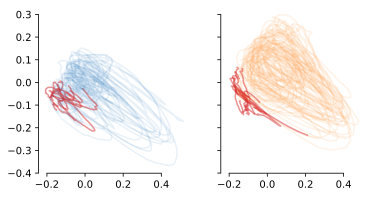

In [9]:
concat_trials = (
    tf
    .pipe(src.munge.reindex_from_event_times,events.xs(key='goCue',level='event'),timecol='trial time')
    .loc[(slice(None),slice('-0.5s','5s')),:]
)
Z = dpca.transform(concat_trials['lfads_rates'].values.T,marginalization='t').T
cis = pd.DataFrame(
    Z,
    index=concat_trials.index,
)

trial_ids = [193,76]
# trial_ids = [183,3]
# trial_ids = [76,354]
trials_to_plot = td.set_index('trial_id').loc[trial_ids]
cis_sampled = cis.loc[trial_ids]

fig,axs = plt.subplots(4,2,figsize=(9,5),sharex=True, sharey='row')
for i,trial in trials_to_plot.reset_index().iterrows():
    src.plot.plot_hand_trace(trial,ax=axs[0,i])
    #axs[0,i].plot(reaction_time.loc[trial['trial_id']].total_seconds(),0,'ro')

for _,trial in cis_sampled.groupby('trial_id'):
    if trial.reset_index(level='task')['task'].values[0] == 'CST':
        axs[1,0].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial[0],color='tab:blue')
        axs[2,0].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial[1],color='tab:blue')
        axs[3,0].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial[2],color='tab:blue')

        axs[1,0].set_ylabel('CIS dim 1')
        axs[2,0].set_ylabel('CIS dim 2')
        axs[3,0].set_ylabel('CIS dim 3')
    else:
        axs[1,1].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial[0],color='tab:orange')
        axs[2,1].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial[1],color='tab:orange')
        axs[3,1].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial[2],color='tab:orange')

sns.despine(fig=fig,trim=True)

cis_sampled = (
    cis
    .unstack(level='relative time')
    .groupby('task')
    .sample(n=10)
    .stack(level='relative time')
    .reorder_levels(['trial_id','relative time','task'])
)
# cis_sampled = cis.loc[[193,76,183,354]]

fig,axs = plt.subplots(1,2,figsize=(6,3),sharey=True,sharex=True)
for task,task_df in cis_sampled.groupby('task'):
    for _,trial in task_df.groupby('trial_id'):
        prego = trial.loc[(slice(None),slice('-0.5s','0s')),:]
        postgo = trial.loc[(slice(None),slice('0s','5s')),:]
        if task == 'CST':
            axs[0].plot(prego[0],prego[1],color='tab:red',alpha=0.5)
            axs[0].plot(postgo[0],postgo[1],color='tab:blue',alpha=0.1)
        elif task == 'RTT':
            axs[1].plot(prego[0],prego[1],color='tab:red',alpha=0.5)
            axs[1].plot(postgo[0],postgo[1],color='tab:orange',alpha=0.1)

sns.despine(fig=fig,trim=True)

# sns.relplot(
#     data=cis_sampled,
#     x='relative time',
#     y=1,
#     hue='task',
#     row='task',
#     kind='line',
#     units='trial_id',
#     estimator=None,
#     errorbar=None,
#     aspect=2,
# )

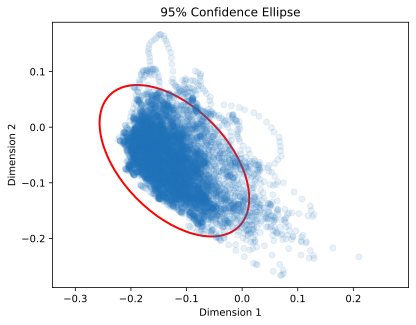

In [10]:
from matplotlib.patches import Ellipse

prego_cis = cis.loc[(slice(None),slice('-0.5s','0s'),'RTT'),:]

# Assuming prego_cis is a DataFrame with at least two columns for the multidimensional data
data = prego_cis.values[:, :2]

# Calculate the mean of the data
mean = np.mean(data, axis=0)

# Calculate the covariance matrix
cov = np.cov(data, rowvar=False)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov)

# Calculate the angle of the ellipse
angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))

# Calculate the width and height of the ellipse
width, height = 2 * np.sqrt(eigenvalues * 5.991)  # 5.991 is the chi-square value for 95% confidence

# Plotting the ellipse
fig, ax = plt.subplots()
ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)

# Plot the data points
ax.scatter(data[:, 0], data[:, 1],alpha=0.1)

# Set the aspect ratio of the plot to be equal
ax.set_aspect('equal', 'datalim')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('95% Confidence Ellipse')
plt.show()

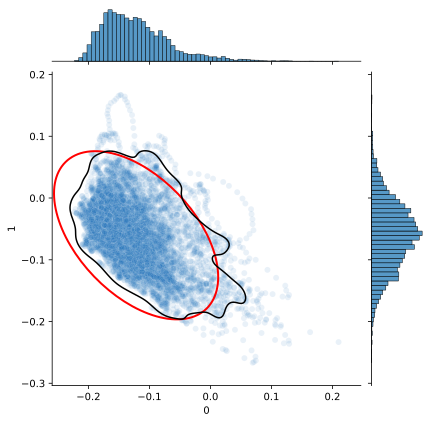

In [11]:
g = sns.jointplot(
    data=prego_cis,
    x=0,
    y=1,
    alpha=0.1,
)
g.plot_joint(sns.kdeplot, color='k', levels=[0.05])
ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor='r', fc='None', lw=2)
g.ax_joint.add_patch(ellipse)

In [12]:
from scipy.spatial.distance import mahalanobis,cdist

num_cis_dims = 4
prego_cis = cis.loc[(slice(None),slice('-0.5s','0s'),'RTT'),:]

def prego_mahal_distance(points: pd.DataFrame,num_dims=num_cis_dims) -> pd.DataFrame:
    assert num_dims <= prego_cis.shape[1], 'Number of dimensions exceeds number of dimensions in prego_cis'

    prego_mean = prego_cis.mean().values[np.newaxis,:num_dims]
    prego_cov = prego_cis.cov().values[:num_dims,:num_dims]
    
    return pd.DataFrame(
        cdist(points.loc[:,:(num_dims-1)],prego_mean,metric='mahalanobis',VI=np.linalg.pinv(prego_cov)),
        index=points.index,
    )

0.017429570588285856

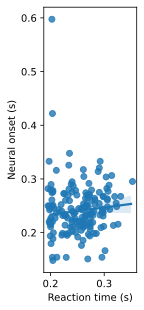

In [13]:
cis_mahal = (
    cis
    .loc[(slice(None),slice('0.15s','1s'),'RTT'),:]
    .pipe(prego_mahal_distance)
    .squeeze()
    .rename('mahalanobis distance')
    .to_frame()
)

# sns.lineplot(
#     data=cis_mahal,
#     x='relative time',
#     y='mahalanobis distance',
#     units='trial_id',
#     estimator=None,
#     errorbar=None,
# )

threshold = 4.5
crossings = (
    cis_mahal
    .gt(threshold)
    .groupby('trial_id')
    .idxmax()
    .squeeze()
    .apply(lambda x: x[1])
)
ax = sns.regplot(
    x=reaction_time.dt.total_seconds(),
    y=crossings.dt.total_seconds(),
    x_jitter=0.005,
    y_jitter=0.005,
    robust=True,
)
ax.set_aspect('equal')
reaction_time.dt.total_seconds()
ax.set_xlabel('Reaction time (s)')
ax.set_ylabel('Neural onset (s)')
reaction_time.corr(crossings)

In [14]:
reaction_time

trial_id
2     0 days 00:00:00.300000
3     0 days 00:00:00.200000
5     0 days 00:00:00.290000
7     0 days 00:00:00.230000
8     0 days 00:00:00.200000
               ...          
386   0 days 00:00:00.200000
387   0 days 00:00:00.290000
391   0 days 00:00:00.290000
392   0 days 00:00:00.230000
393   0 days 00:00:00.230000
Length: 167, dtype: timedelta64[ns]

/Users/raeed/codebase/0-projects/cst-dynamics/src/plot.py:124: RuntimeWarning: invalid value encountered in cast
  trial['idx_rtHoldTimes'].astype(int),


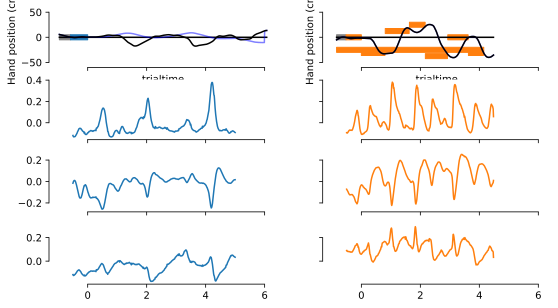

In [15]:
trial_ids = [193,76]
trial_ids = [183,3]
#trial_ids = [76,354]
trials_to_plot = td.set_index('trial_id').loc[trial_ids]
cis_sampled = cis.loc[trial_ids]

fig,axs = plt.subplots(4,2,figsize=(9,5),sharex=True, sharey='row')
for i,trial in trials_to_plot.reset_index().iterrows():
    src.plot.plot_hand_trace(trial,ax=axs[0,i])
    #axs[0,i].plot(reaction_time.loc[trial['trial_id']].total_seconds(),0,'ro')

for _,trial in cis_sampled.groupby('trial_id'):
    if trial.reset_index(level='task')['task'].values[0] == 'CST':
        axs[1,0].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial[0],color='tab:blue')
        axs[2,0].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial[1],color='tab:blue')
        axs[3,0].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial[2],color='tab:blue')
    else:
        axs[1,1].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial[0],color='tab:orange')
        axs[2,1].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial[1],color='tab:orange')
        axs[3,1].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial[2],color='tab:orange')

sns.despine(fig=fig,trim=True)

In [16]:
cis_sampled

0         1         2  \
trial_id relative time            task                                 
183      -1 days +23:59:59.500000 CST  -0.119339 -0.016261 -0.114148   
         -1 days +23:59:59.510000 CST  -0.127150 -0.007156 -0.120195   
         -1 days +23:59:59.520000 CST  -0.131550  0.001069 -0.122323   
         -1 days +23:59:59.530000 CST  -0.132421  0.005611 -0.121640   
         -1 days +23:59:59.540000 CST  -0.131630  0.008621 -0.119434   
...                                          ...       ...       ...   
3        0 days 00:00:04.440000   RTT   0.158651 -0.025529  0.087473   
         0 days 00:00:04.450000   RTT   0.153696 -0.020234  0.087635   
         0 days 00:00:04.460000   RTT   0.139423 -0.013486  0.081328   
         0 days 00:00:04.470000   RTT   0.129788 -0.010038  0.078787   
         0 days 00:00:04.480000   RTT   0.057228  0.009511  0.032222   

                                               3         4         5  \
trial_id relative time            task                                 
183      -1 days +23:59:59.500000 CST  -0.138941  0.245260 -0.104541   
         -1 days +23:59:59.510000 CST  -0.126001  0.232171 -0.102795   
         -1 days +23:59:59.520000 CST  -0.117312  0.223288 -0.100263   
         -1 days +23:59:59.530000 CST  -0.112256  0.216840 -0.097254   
         -1 days +23:59:59.540000 CST  -0.109055  0.211859 -0.094177   
...                                          ...       ...       ...   
3        0 days 00:00:04.440000   RTT  -0.092162 -0.015814 -0.007115   
         0 days 00:00:04.450000   RTT  -0.086974 -0.019120  0.000772   
         0 days 00:00:04.460000   RTT  -0.079797 -0.021285  0.007358   
         0 days 00:00:04.470000   RTT  -0.074263 -0.024241  0.012435   
         0 days 00:00:04.480000   RTT  -0.038278 -0.033487  0.016701   

                                               6         7         8         9  
trial_id relative time            task                                          
183      -1 days +23:59:59.500000 CST   0.005311  0.016264  0.066721 -0.083735  
         -1 days +23:59:59.510000 CST   0.012945  0.010683  0.057942 -0.076601  
         -1 days +23:59:59.520000 CST   0.018272  0.006829  0.049553 -0.069269  
         -1 days +23:59:59.530000 CST   0.021883  0.004025  0.041662 -0.063077  
         -1 days +23:59:59.540000 CST   0.024405  0.001886  0.034125 -0.057122  
...                                          ...       ...       ...       ...  
3        0 days 00:00:04.440000   RTT  -0.008061 -0.047368 -0.127955  0.068312  
         0 days 00:00:04.450000   RTT  -0.012445 -0.038631 -0.123285  0.071649  
         0 days 00:00:04.460000   RTT  -0.012523 -0.033012 -0.117729  0.073592  
         0 days 00:00:04.470000   RTT  -0.013799 -0.027390 -0.111618  0.075023  
         0 days 00:00:04.480000   RTT   0.004837 -0.031515 -0.103284  0.066117  

[1050 rows x 10 columns]

/Users/raeed/codebase/0-projects/cst-dynamics/src/crystal.py:228: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  tf


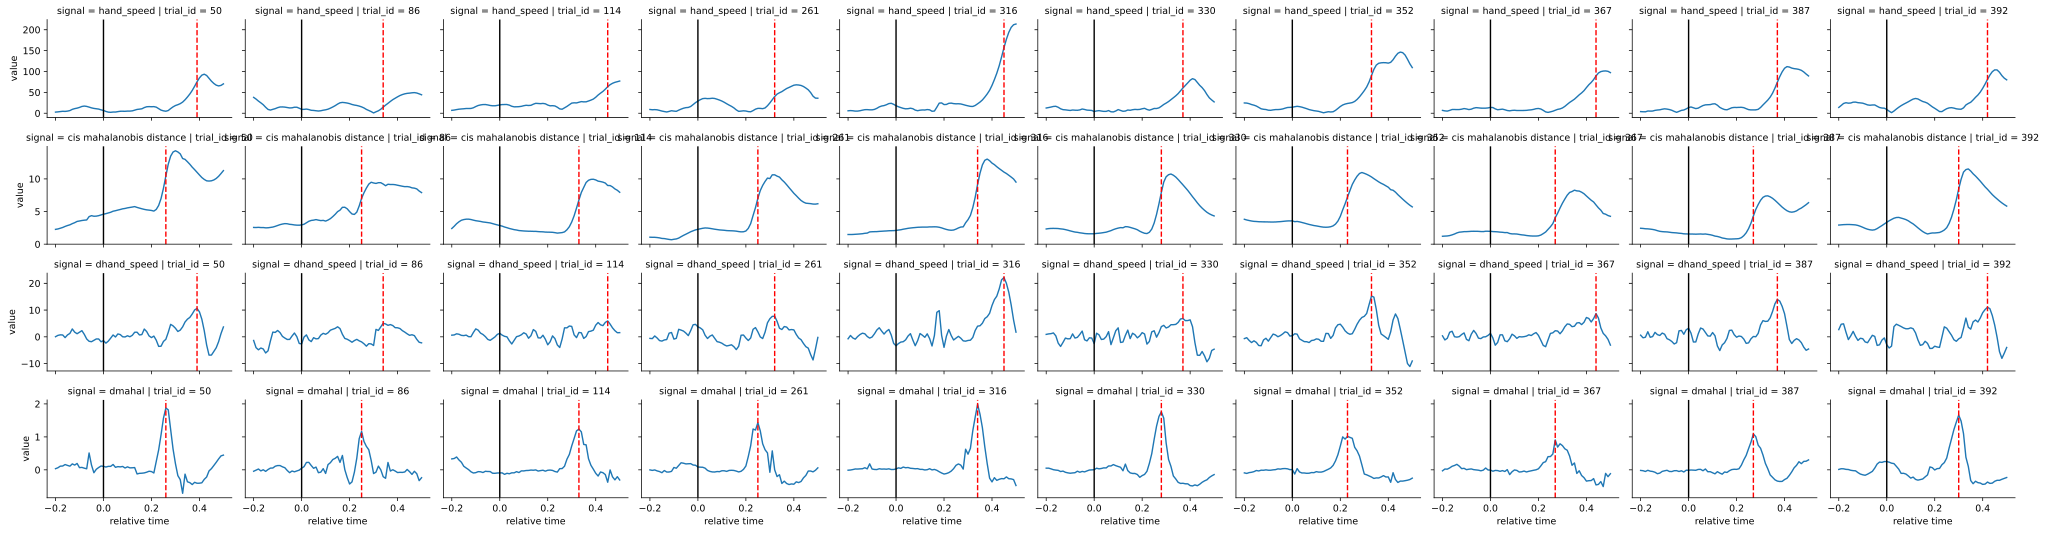

In [17]:
onset_signals = (
    tf
    .pipe(src.munge.reindex_from_event_times,events.xs(key='goCue',level='event'),timecol='trial time')
    .xs(key='RTT',axis=0,level='task')
    .loc[(slice(None),slice('-0.5s','0.6s')),:]
    .pipe(src.munge.hierarchical_assign,{
        'cis': lambda df: pd.DataFrame(
            dpca.transform(df['lfads_rates'].values.T,marginalization='t').T,
            index=df.index
        ),
    })
    .assign(**{
        'cis mahalanobis distance': lambda df: prego_mahal_distance(df['cis']),
    })
    [['hand_speed','cis mahalanobis distance']]
    .droplevel('channel',axis=1)
    .assign(**{
        'dhand_speed': lambda x: x['hand_speed'].diff(),
        'dmahal': lambda x: x['cis mahalanobis distance'].diff(),
    })
)

reaction_time = (
    onset_signals
    .loc[(slice(None),slice('0.1s','0.5s')),:]
    .groupby('trial_id')
    .apply(lambda df: pd.to_timedelta(get_onset_idx(df['hand_speed'])*10e-3 + 0.1,unit='s'))
)
peak_acc_time = (
    onset_signals
    .loc[(slice(None),slice('0.1s','0.5s')),'dhand_speed']
    .groupby('trial_id')
    .idxmax()
    .apply(lambda x: x[1])
)

neural_onset = (
    onset_signals
    .loc[(slice(None),slice('0.1s','0.5s')),:]
    .groupby('trial_id')
    .apply(lambda df: pd.to_timedelta(get_onset_idx(df['cis mahalanobis distance'],min_ds=0.01)*10e-3 + 0.1,unit='s'))
)
peak_dmahal = (
    onset_signals
    .loc[(slice(None),slice('0.1s','0.5s')),'dmahal']
    .groupby('trial_id')
    .idxmax()
    .apply(lambda x: x[1])
)

num_trials_to_plot = 10
g = sns.relplot(
    data=(
        onset_signals
        .loc[(slice(None),slice('-0.2s','0.5s')),:]
        .pipe(src.crystal.sample_trials,timecol='relative time',n=num_trials_to_plot)
        .stack(level='signal')
        .astype(float)
        .rename('value')
        .reset_index()
        .assign(**{
            'relative time': lambda x: x['relative time'].dt.total_seconds(),
        })
    ),
    x='relative time',
    y='value',
    col='trial_id',
    row='signal',
    kind='line',
    aspect=1.5,
    height=2,
    facet_kws={
        'sharey':'row',
    },
)
g.refline(x=0,linestyle='-',color='k')
for (signal,trial_id),ax in g.axes_dict.items():
    if signal == 'hand_speed' or signal == 'dhand_speed':
        ax.axvline(peak_acc_time.loc[trial_id].total_seconds(),color='r',linestyle='--')
    elif signal == 'cis mahalanobis distance' or signal == 'dmahal':
        # ax.axhline(4.5,color='k',linestyle='--')
        ax.axvline(peak_dmahal.loc[trial_id].total_seconds(),color='r',linestyle='--')
    # ax.plot(reaction_time.loc[trial_id].total_seconds(),0,'ro')

0.5288701118081353

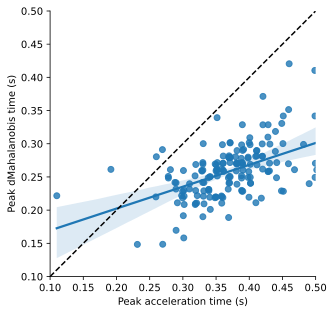

In [18]:
ax = sns.regplot(
    x=peak_acc_time.dt.total_seconds(),
    y=peak_dmahal.dt.total_seconds(),
    x_jitter=0.002,
    y_jitter=0.002,
    robust=True,
)
ax.plot([0.1,0.5],[0.1,0.5],'k--')
ax.set_xlabel('Peak acceleration time (s)')
ax.set_ylabel('Peak dMahalanobis time (s)')
ax.set_xlim(0.1,0.5)
ax.set_ylim(0.1,0.5)
ax.set_aspect('equal')
sns.despine(ax=ax,trim=True,)
peak_dmahal.corr(peak_acc_time)

In [19]:
reaction_time.corr(neural_onset)

0.1864566354598954

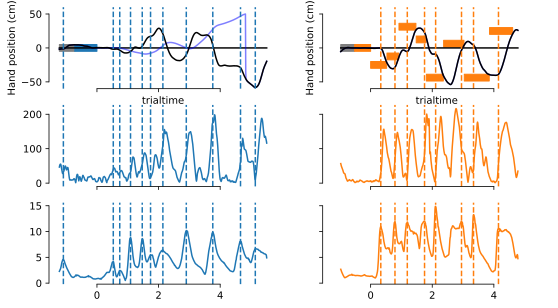

In [158]:
from scipy.signal import find_peaks

trial_ids = [193,76]
# trial_ids = [183,3]
trials_to_plot = td.set_index('trial_id').loc[trial_ids]
cis_sampled = (
    tf
    .pipe(src.munge.reindex_from_event_times,events.xs(key='goCue',level='event'),timecol='trial time')
    .pipe(src.munge.hierarchical_assign,{
        'cis': lambda df: pd.DataFrame(
            dpca.transform(df['lfads_rates'].values.T,marginalization='t').T,
            index=df.index
        ),
    })
    .assign(**{
        'cis mahalanobis distance': lambda df: prego_mahal_distance(df['cis']),
    })
    [['hand_speed','cis mahalanobis distance']]
    .droplevel('channel',axis=1)
    .assign(**{
        'dhand_speed': lambda x: x['hand_speed'].diff(),
        'dmahal': lambda df: df['cis mahalanobis distance'].groupby('trial_id').transform(lambda x: x.diff()),
    })
    .loc[trial_ids]
)

fig,axs = plt.subplots(3,2,figsize=(9,5),sharex=True, sharey='row')
for i,trial in trials_to_plot.reset_index().iterrows():
    src.plot.plot_hand_trace(trial,ax=axs[0,i])
    #axs[0,i].plot(reaction_time.loc[trial['trial_id']].total_seconds(),0,'ro')

for _,trial in cis_sampled.groupby('trial_id'):
    if trial.reset_index(level='task')['task'].values[0] == 'CST':
        col=0
        color='tab:blue'
    else:
        col=1
        color='tab:orange'

    axs[1,col].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial['hand_speed'],color=color)
    axs[2,col].plot(trial.reset_index(level='relative time')['relative time']/np.timedelta64(1,'s'),trial['cis mahalanobis distance'],color=color)

    peaks, props = find_peaks(trial['cis mahalanobis distance'],prominence=1)
    # peaks, props = find_peaks(trial['dmahal'],prominence=1)
    for peak in peaks:
        for row in range(3):
            axs[row,col].axvline(trial.reset_index(level='relative time')['relative time'].values[peak]/np.timedelta64(1,'s'),color=color,linestyle='--')

sns.despine(fig=fig,trim=True)

In [92]:
def find_peak_index(s: pd.Series,timecol: str='relative time',**kwargs):
    peak_idx,_ = find_peaks(s,**kwargs)
    return (
        s
        .reset_index(level=timecol)
        [timecol]
        .iloc[peak_idx]
    )

cis_peaks= (
    tf
    .pipe(src.munge.reindex_from_event_times,events.xs(key='ctHold',level='event'),timecol='trial time')
    ['lfads_rates']
    .pipe(
        lambda df: pd.DataFrame(
            dpca.transform(df.values.T,marginalization='t').T,
            index=df.index
        ),
    )
    .pipe(prego_mahal_distance)
    .squeeze()
    .rename('cis mahalanobis distance')
    .pipe(find_peak_index,prominence=1)
    .rename('cis peak times')
    .loc[lambda x: x > pd.Timedelta(0)]
    .to_frame()
    .assign(**{
        'peak number': lambda x: x.groupby('trial_id').cumcount(),
    })
    .set_index('peak number',append=True)
    .squeeze()
)
print(cis_peaks.loc[76])
print(target_times.loc[76])

task  peak number
RTT   0             0 days 00:00:01.300000
      1             0 days 00:00:01.760000
      2             0 days 00:00:02.160000
      3             0 days 00:00:02.720000
      4             0 days 00:00:03.080000
      5             0 days 00:00:03.920000
      6             0 days 00:00:04.310000
      7             0 days 00:00:05.120000
Name: cis peak times, dtype: timedelta64[ns]
event                   target onset     target acquisition  location
target number                                                        
0             0 days 00:00:00.970000 0 days 00:00:01.490000     35.00
1             0 days 00:00:01.500000 0 days 00:00:01.880000     47.50
2             0 days 00:00:01.890000 0 days 00:00:02.440000     91.25
3             0 days 00:00:02.450000 0 days 00:00:02.770000     72.50
4             0 days 00:00:02.780000 0 days 00:00:03.330000     16.25
5             0 days 00:00:03.340000        0 days 00:00:04     66.25
6             0 days 00:00:04.010

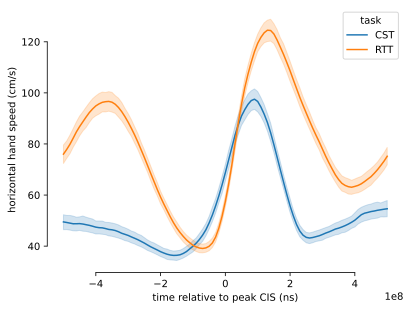

In [160]:
temp = (
    cis_peaks
    .groupby('peak number')
    .apply(lambda x: src.munge.reindex_from_event_times(
        tf,
        x.reset_index(level='peak number',drop=True),
        timecol='trial time'
    ))
    .loc[(slice(None),slice(None),slice('-0.5s','0.5s')),:]
)

ax = sns.lineplot(
    data=temp.reset_index().assign(**{'snip id': lambda x: x['trial_id'].astype(str) + '_' + x['peak number'].astype(str)}),
    x='relative time',
    y=('hand_speed',0),
    hue='task',
    # units='snip id',
    # estimator=None,
    # errorbar=None,
    # lw=0.5,
    errorbar='ci',
)
ax.set_ylabel('horizontal hand speed (cm/s)')
ax.set_xlabel('time relative to peak CIS (ns)')
sns.despine(ax=ax,trim=True)

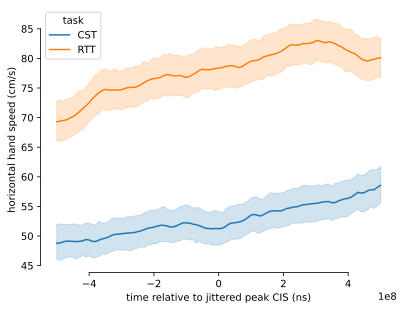

In [162]:
temp = (
    (cis_peaks + pd.to_timedelta(np.random.normal(0,0.5,cis_peaks.shape),unit='s').round('10ms'))
    .groupby('peak number')
    .apply(lambda x: src.munge.reindex_from_event_times(
        tf,
        x.reset_index(level='peak number',drop=True),
        timecol='trial time'
    ))
    .loc[(slice(None),slice(None),slice('-0.5s','0.5s')),:]
)

ax = sns.lineplot(
    data=temp,
    x='relative time',
    y=('hand_speed',0),
    hue='task',
    # units='snip id',
    # estimator=None,
    # errorbar=None,
    # lw=0.5,
    errorbar='ci',
)
ax.set_ylabel('horizontal hand speed (cm/s)')
ax.set_xlabel('time relative to jittered peak CIS (ns)')
sns.despine(ax=ax,trim=True)

In [150]:
(
    cis_peaks
    + pd.TimedeltaIndex(np.random.normal(0,0.5,cis_peaks.shape),unit='s').round('10ms')
)

/var/folders/wf/m89rq9p97kq6fdqj23hkrm_h0000gn/T/ipykernel_2165/1360711957.py:3: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  + pd.TimedeltaIndex(np.random.normal(0,0.5,cis_peaks.shape),unit='s').round('10ms')


trial_id  task  peak number
1         CST   0             0 days 00:00:01.440000
                1             0 days 00:00:00.640000
                2             0 days 00:00:01.880000
                3             0 days 00:00:02.260000
                4             0 days 00:00:03.720000
                                       ...          
393       RTT   5             0 days 00:00:03.010000
                6             0 days 00:00:02.970000
                7             0 days 00:00:03.500000
                8             0 days 00:00:03.560000
394       CST   0             0 days 00:00:02.150000
Length: 3400, dtype: timedelta64[ns]

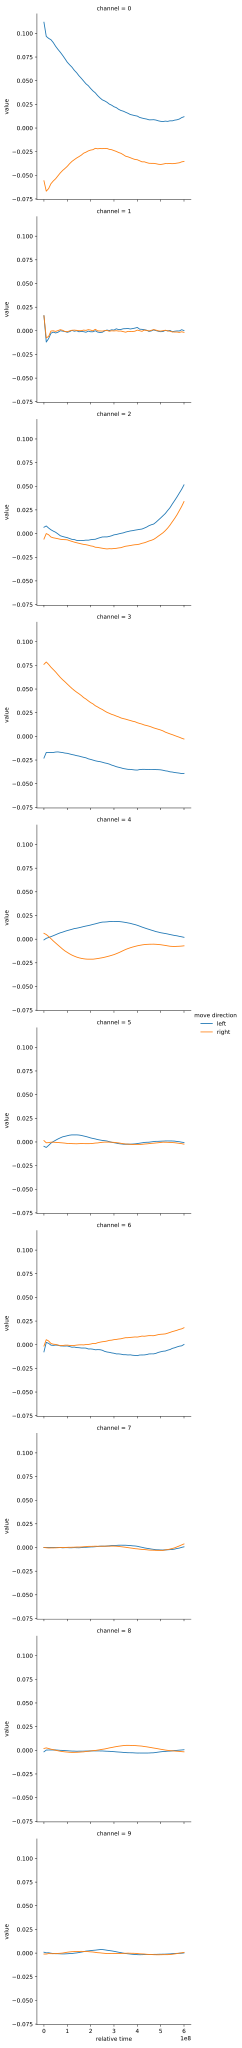

In [ ]:
## looking for preparatory activity using varimax on neural activity around first go cue of RTT trials

from sklearn.decomposition import PCA

def get_move_directions(df: pd.DataFrame) -> pd.Series:
    return (
        df
        # .pipe(src.munge.reindex_from_event_times,events.xs(key='goCue',level='event'),timecol='trial time')
        [('hand_vel',0)]
        .groupby('trial_id')
        .agg('mean')
        .map(lambda x: 'left' if x < 0 else 'right')
        .rename('move direction')
    )

temp = (
    tf
    .pipe(src.munge.reindex_from_event_times,events.xs(key='goCue',level='event'),timecol='trial time')
    .xs(key='RTT',axis=0,level='task')
    .loc[(slice(None),slice('0s','0.6s')),:]
    .reset_index(level='relative time')
    .assign(**{
        'move direction': get_move_directions,
    })
    .set_index(['move direction','relative time'],append=True)
    .groupby(['move direction','relative time'])
    .mean()
    .pipe(src.munge.hierarchical_assign,{
        'lfads pca': lambda df: pd.DataFrame(
            PCA(n_components=10).fit_transform(df['lfads_rates']),
            index=df.index
        ),
    })
    .pipe(src.munge.hierarchical_assign,{
        'varimax pca': lambda df: pd.DataFrame(
            src.crystal_models.VarimaxTransformer().fit_transform(df['lfads pca']),
            index=df.index
        ),
    })
)
sns.relplot(
    data=temp['varimax pca'].stack(level='channel').rename('value').to_frame(),
    x='relative time',
    y='value',
    row='channel',
    hue='move direction',
    kind='line',
)

In [86]:
events.loc[76]

event
ctHold               0 days 00:00:00
pretaskHold   0 days 00:00:00.450000
goCue         0 days 00:00:00.970000
rtgoCue       0 days 00:00:00.970000
rtHold        0 days 00:00:01.490000
rtgoCue       0 days 00:00:01.500000
rtHold        0 days 00:00:01.880000
rtgoCue       0 days 00:00:01.890000
rtHold        0 days 00:00:02.440000
rtgoCue       0 days 00:00:02.450000
rtHold        0 days 00:00:02.770000
rtgoCue       0 days 00:00:02.780000
rtHold        0 days 00:00:03.330000
rtgoCue       0 days 00:00:03.340000
rtHold               0 days 00:00:04
rtgoCue       0 days 00:00:04.010000
rtHold        0 days 00:00:04.820000
rtgoCue       0 days 00:00:04.830000
rtHold        0 days 00:00:05.580000
reward        0 days 00:00:05.590000
end           0 days 00:00:05.760000
dtype: timedelta64[ns]

In [26]:
tf

signal                               hand_speed rel_cursor_pos             \
channel                                     0              0          1     
trial_id task trial time                                                    
1        CST  0 days 00:00:00          8.977924      -4.025707  -5.850120   
              0 days 00:00:00.010000   9.712004      -3.966160  -5.821519   
              0 days 00:00:00.020000  11.015917      -3.884967  -5.722092   
              0 days 00:00:00.030000  10.916048      -3.806998  -5.666936   
              0 days 00:00:00.040000   10.62704      -3.704673  -5.607723   
...                                         ...            ...        ...   
394      CST  0 days 00:00:03.030000    7.54683      27.525579 -10.182451   
              0 days 00:00:03.040000   6.924867      27.471843 -10.142223   
              0 days 00:00:03.050000   8.832921      27.409117 -10.138108   
              0 days 00:00:03.060000   12.50278      27.315395 -10.183912   
              0 days 00:00:03.070000  16.584867      27.192005 -10.262625   

signal                               cursor_vel           rel_hand_pos  \
channel                                     0         1            0     
trial_id task trial time                                                 
1        CST  0 days 00:00:00          5.729341  5.338938    -4.025707   
              0 days 00:00:00.010000   7.036972  6.401392    -3.966160   
              0 days 00:00:00.020000   7.958073  7.729136    -3.884967   
              0 days 00:00:00.030000   9.014685  5.718453    -3.806998   
              0 days 00:00:00.040000   9.986239  3.889947    -3.704673   
...                                         ...       ...          ...   
394      CST  0 days 00:00:03.030000  -5.938797  3.978445    27.525579   
              0 days 00:00:03.040000  -5.823107  2.217181    27.471843   
              0 days 00:00:03.050000  -7.822422 -2.084443    27.409117   
              0 days 00:00:03.060000 -10.855589 -6.225854    27.315395   
              0 days 00:00:03.070000 -12.996360 -9.711643    27.192005   

signal                                                       hand_vel  \
channel                                     1          2          0     
trial_id task trial time                                                
1        CST  0 days 00:00:00         -5.850120 -16.486355   5.973144   
              0 days 00:00:00.010000  -5.821519 -16.479292   6.727050   
              0 days 00:00:00.020000  -5.722092 -16.439823   8.104012   
              0 days 00:00:00.030000  -5.666936 -16.467788   9.122670   
              0 days 00:00:00.040000  -5.607723 -16.457319   9.736655   
...                                         ...        ...        ...   
394      CST  0 days 00:00:03.030000 -10.182451 -93.107882  -5.893637   
              0 days 00:00:03.040000 -10.142223 -93.099388  -5.828899   
              0 days 00:00:03.050000 -10.138108 -93.052599  -7.843264   
              0 days 00:00:03.060000 -10.183912 -93.020257 -10.834871   
              0 days 00:00:03.070000 -10.262625 -93.041543 -12.983107   

signal                                          ... lfads_rates            \
channel                                    1    ...         146       147   
trial_id task trial time                        ...                         
1        CST  0 days 00:00:00         5.603109  ...   -0.028163 -0.034251   
              0 days 00:00:00.010000  6.436993  ...   -0.028198 -0.034438   
              0 days 00:00:00.020000  7.461590  ...   -0.028357 -0.034809   
              0 days 00:00:00.030000  5.939561  ...   -0.028632 -0.035118   
              0 days 00:00:00.040000  3.721528  ...   -0.028864 -0.035133   
...                                        ...  ...         ...       ...   
394      CST  0 days 00:00:03.030000  3.966632  ...    0.053847 -0.002355   
              0 days 00:00:03.040000  1.993919  ...    0.054801 -0.003483   
              

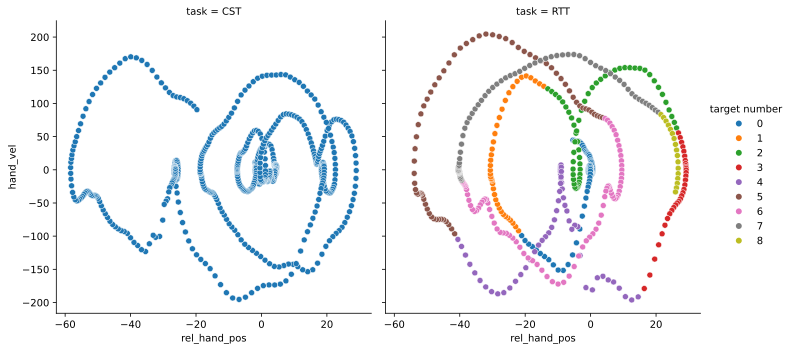

In [106]:
trial_ids = [193,76]

trials_to_plot = td.set_index('trial_id').loc[trial_ids]
temp = (
    tf
    .pipe(src.munge.reindex_from_event_times,events.xs(key='goCue',level='event'),timecol='trial time')
    .loc[(trial_ids,slice('0s','4s')),:]
)

# fig, axs = plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
# for i,(_,trial) in enumerate(temp.groupby('trial_id')):
#     axs[i].plot(trial[('rel_hand_pos',0)],trial[('hand_vel',0)])

trials_to_plot['rt_locations']
target_times.loc[trial_ids]

def get_current_target_location(trial_id: int, trial_time: pd.Timedelta) -> float:
    trial_targets = target_times.loc[trial_id]

    if pd.isna(trial_targets.loc[0,'location']): # there's only one target, i.e. it's a CST trial
        return np.nan

    if trial_time < trial_targets['target onset'].values[0]:
        return 0

    for target_num,target_info in trial_targets.iterrows():
        if trial_time >= target_info['target onset'] and trial_time < target_info['target acquisition']:
            return target_info['location']

    return np.nan

def get_current_target_number(trial_id: int, trial_time: pd.Timedelta) -> int:
    trial_targets = target_times.loc[trial_id]

    if pd.isna(trial_targets.loc[0,'location']): # there's only one target, i.e. it's a CST trial
        return 0

    if trial_time < trial_targets['target onset'].values[0]:
        return 0

    for target_num,target_info in trial_targets.iterrows():
        if trial_time >= target_info['target onset'] and trial_time <= target_info['target acquisition']:
            return int(target_num)

    return 8

temp = (
    tf
    .loc[trial_ids]
    .assign(**{
        'target location': lambda df: (
            df
            .apply(lambda x: get_current_target_location(x.name[0],x.name[2]),axis=1)
        ),
        'target number': lambda df: (
            df
            .apply(lambda x: get_current_target_number(x.name[0],x.name[2]),axis=1)
        ),
    })
)
# sns.scatterplot(
#     data=temp.loc[76],
#     x=('target location',''),
#     y=('rel_hand_pos',0),
# )

sns.relplot(
    data=(
        temp
        .filter(items=[('rel_hand_pos',0),('hand_vel',0),('target location',''),('target number','')])
        .droplevel(1,axis=1)
    ),
    x='rel_hand_pos',
    y='hand_vel',
    col='task',
    hue='target number',
    kind='scatter',
    palette='tab10',
)


In [ ]:
# align on peak CIS signal and average snippets
